In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd

# Specify the file name you uploaded
file_name = "/content/drive/MyDrive/Breast_cancer_data.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

In [24]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


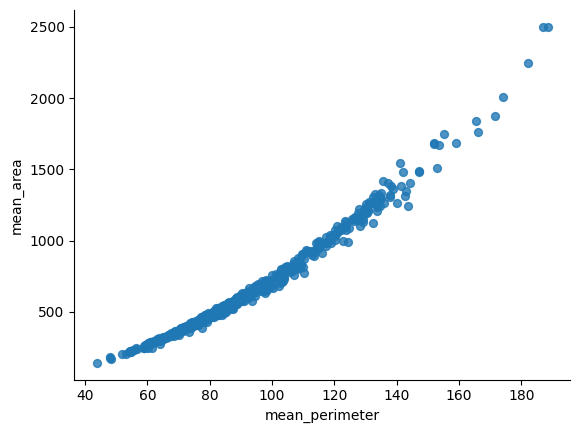

In [25]:
# @title mean_perimeter vs mean_area

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mean_perimeter', y='mean_area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

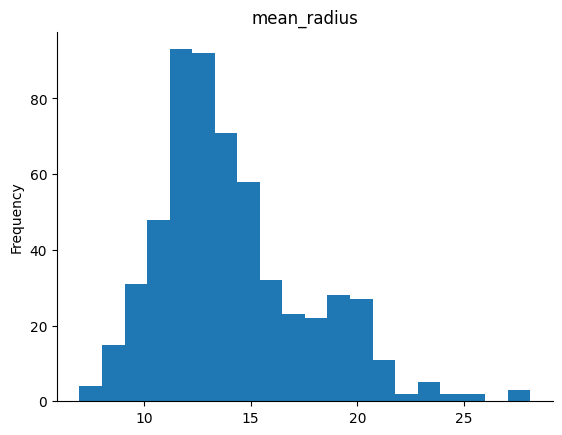

In [26]:
# @title mean_radius

from matplotlib import pyplot as plt
df['mean_radius'].plot(kind='hist', bins=20, title='mean_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
df.shape

(569, 6)

In [28]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [29]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# 1 | Data Preprocessing


Prepare the dataset before training

# Train test split

In [30]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Apply Feature Scalling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test shapes  : X = {X_test.shape},  y = {y_test.shape}\n")

Train shapes : X = (455, 5), y = (455,)
Test shapes  : X = (114, 5),  y = (114,)



## Defining the models and Training them

In [33]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
from sklearn.svm import SVC
kesvm = SVC(kernel = 'rbf')
gc, bc, rfc,gbc, kn,gnb, cl  = DecisionTreeClassifier(),BaggingClassifier(),RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=5,algorithm='brute',p=1),GaussianNB(), LogisticRegression()
gc.fit(X_train, y_train)
bc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
kn.fit(X_train, y_train)
gnb.fit(X_train, y_train)
cl.fit(X_train, y_train)
svm.fit(X_train, y_train)
kesvm.fit(X_train, y_train)

SVC()

## Make predictions

# Prediction on training dataset

In [34]:
pg = gc.predict(X_train)
pm = bc.predict(X_train)
pb = rfc.predict(X_train)
pc = rfc.predict(X_train)
pk = rfc.predict(X_train)
ps = gnb.predict(X_train)
pt = cl.predict(X_train)
pu = svm.predict(X_train)
pr = kesvm.predict(X_train)

# Prediction on testing dataset

In [35]:
ypg = gc.predict(X_test)
ypm = bc.predict(X_test)
ypb = rfc.predict(X_test)
ypc = rfc.predict(X_test)
ypk = rfc.predict(X_test)
yps = gnb.predict(X_test)
ypt = cl.predict(X_test)
ypu = svm.predict(X_test)
ypr = kesvm.predict(X_test)

# Evaluation

In [36]:
from sklearn.metrics import confusion_matrix
dd=confusion_matrix(y_test, ypg)
bb=confusion_matrix(y_test, ypm)
rr=confusion_matrix(y_test, ypb)
gg=confusion_matrix(y_test, ypc)
kk=confusion_matrix(y_test, ypk)
gn=confusion_matrix(y_test, yps)
ll=confusion_matrix(y_test, ypt)
ss=confusion_matrix(y_test, ypu)
ks=confusion_matrix(y_test, ypr)

print("DecisionTree  confusion_matrix ",dd)
print("BaggingClassifier confusion_matrix ",bb)
print("RandomForestClassifier confusion_matrix ",rr)
print("GradientBoostingClassifier confusion_matrix ",gg)
print("KNeighborsClassifier confusion_matrix ",kk)
print("Gaussian confusion_matrix ",gn)
print("LogisticRegression confusion_matrix ",ll)
print("Support Vector Machine confusion_matrix ",ss)
print("SVC confusion_matrix ",ks)

DecisionTree  confusion_matrix  [[40  3]
 [ 8 63]]
BaggingClassifier confusion_matrix  [[41  2]
 [ 5 66]]
RandomForestClassifier confusion_matrix  [[42  1]
 [ 3 68]]
GradientBoostingClassifier confusion_matrix  [[42  1]
 [ 3 68]]
KNeighborsClassifier confusion_matrix  [[42  1]
 [ 3 68]]
Gaussian confusion_matrix  [[37  6]
 [ 0 71]]
LogisticRegression confusion_matrix  [[39  4]
 [ 3 68]]
Support Vector Machine confusion_matrix  [[39  4]
 [ 3 68]]
SVC confusion_matrix  [[40  3]
 [ 3 68]]


# Accuracy on training dataset

In [37]:
from sklearn.metrics import accuracy_score
print(f"DecisionTree accuracy    =  {round(accuracy_score(y_train, pg), 2)*100} %")
print(f"BaggingClassifier accuracy =  {round(accuracy_score(y_train, pm), 2)*100} %")
print(f"RandomForestClassifier accuracy   =  {round(accuracy_score(y_train, pb), 2)*100} %")
print(f"GradientBoostingClassifier accuracy   =  {round(accuracy_score(y_train, pc), 2)*100} %")
print(f"KNeighborsClassifier accuracy   =  {round(accuracy_score(y_train, pk), 2)*100} %")
print(f"Gaussian accuracy    =  {round(accuracy_score(y_train, ps), 2)*100} %")
print(f"LogisticRegression accuracy   =  {round(accuracy_score(y_train, pt), 2)*100} %")
print(f"Support Vector Machine accuracy    =  {round(accuracy_score(y_train, pu), 2)*100} %")
print(f"SVC accuracy =  {round(accuracy_score(y_train, pr), 2)*100} %")

DecisionTree accuracy    =  100.0 %
BaggingClassifier accuracy =  98.0 %
RandomForestClassifier accuracy   =  99.0 %
GradientBoostingClassifier accuracy   =  99.0 %
KNeighborsClassifier accuracy   =  99.0 %
Gaussian accuracy    =  90.0 %
LogisticRegression accuracy   =  93.0 %
Support Vector Machine accuracy    =  93.0 %
SVC accuracy =  94.0 %


# Accuracy on testing dataset

In [38]:
print(f"DecisionTree accuracy    =  {round(accuracy_score(y_test, ypg), 2)*100} %")
print(f"BaggingClassifier accuracy =  {round(accuracy_score(y_test, ypm), 2)*100} %")
print(f"RandomForestClassifier accuracy   =  {round(accuracy_score(y_test, ypb), 2)*100} %")
print(f"GradientBoostingClassifier accuracy   =  {round(accuracy_score(y_test, ypc), 2)*100} %")
print(f"KNeighborsClassifier accuracy   =  {round(accuracy_score(y_test, ypk), 2)*100} %")
print(f"Gaussian accuracy    =  {round(accuracy_score(y_test, yps), 2)*100} %")
print(f"LogisticRegression accuracy   =  {round(accuracy_score(y_test, ypt), 2)*100} %")
print(f"Support Vector Machine accuracy    =  {round(accuracy_score(y_test, ypu), 2)*100} %")
print(f"SVC accuracy =  {round(accuracy_score(y_test, ypr), 2)*100} %")

DecisionTree accuracy    =  90.0 %
BaggingClassifier accuracy =  94.0 %
RandomForestClassifier accuracy   =  96.0 %
GradientBoostingClassifier accuracy   =  96.0 %
KNeighborsClassifier accuracy   =  96.0 %
Gaussian accuracy    =  95.0 %
LogisticRegression accuracy   =  94.0 %
Support Vector Machine accuracy    =  94.0 %
SVC accuracy =  95.0 %


In [39]:
print(X_test[1])

[ 1.36536344  0.49866473  1.30551088  1.34147086 -0.40653902]


In [40]:
prediction=rfc.predict([[ 1.36536344,  0.49866473,  1.30551088,  1.34147086, -0.40653902]])

In [41]:
print(prediction)

[0]


In [42]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))